# Problem 1: EU Cities Temperatures Dataset (55 points)

## Loading EuCitiesTemperatures.csv into a Pandas DataFrame

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df_cities = pd.read_csv('EuCitiesTemperatures.csv')

In [6]:
df_cities

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


## Preprocessing/Analysis (28 pts)

### [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [7]:
# getting mean latitudes and longitudes of each country
countries = df_cities.groupby('country')
lonmean = countries['longitude'].transform('mean')
latmean = countries['latitude'].transform('mean')

In [8]:
# filling in NaN values
df_cities['longitude'] = df_cities['longitude'].fillna(lonmean)
df_cities['latitude'] = df_cities['latitude'].fillna(latmean)
# rounding to 2 decimal places
df_cities['longitude'] = df_cities['longitude'].round(2)
df_cities['latitude'] = df_cities['latitude'].round(2)

In [9]:
df_cities

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [10]:
# subset of cities that ie between latitudes 40 to 60 and longitudes 15 to 30
citysubset = df_cities[
    (df_cities['latitude'] >= 40) & (df_cities['latitude'] <= 60) &
    (df_cities['longitude'] >= 15) & (df_cities['longitude'] <= 30)
]

In [11]:
# counting numbers of cities per country
countrycount = citysubset['country'].value_counts()

In [12]:
# finding out countries with the max number of cities
countrycount[countrycount == countrycount.max()].index.tolist()

['Romania', 'Poland']

### [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [13]:
# defining region type as a columns
df_cities['region_type'] = df_cities['EU'] + '_' + df_cities['coastline']

In [14]:
# average temp for each region type
regiontemps = df_cities.groupby('region_type')['temperature']
avgregiontemps = regiontemps.transform('mean')
df_cities['temperature'] = df_cities['temperature'].fillna(avgregiontemps)

In [15]:
# dropping region type column
df_cities.drop(columns=['region_type'], inplace=True)

In [16]:
# printing this out in its entirety
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_cities.to_csv('df_cities.csv')

## Visualization (27 pts)
For all plots, make sure to label the axes, and set appropriate tick labels.

### [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

In [17]:
# remaking region types
df_cities['region_type'] = df_cities['EU'] + '_' + df_cities['coastline']
# getting number of cities in each region type
citiesinregion = df_cities.groupby('region_type').size()

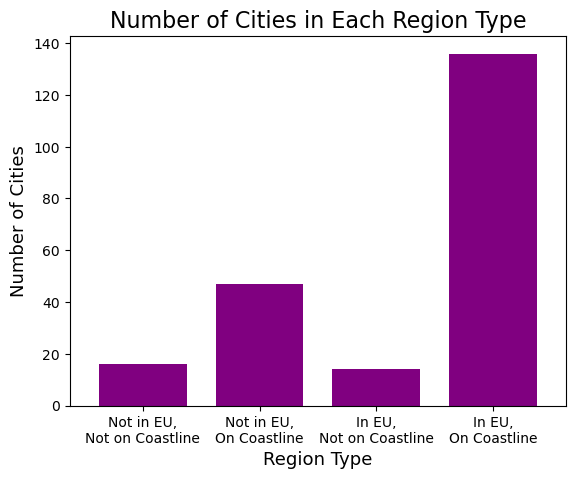

In [18]:
# plotting the graph
citiesinregion.plot(kind='bar', color='purple', width=0.75) # i like the color purple
# editting axis labels & title
plt.title('Number of Cities in Each Region Type', size=16)
plt.xlabel('Region Type', size=13)
plt.ylabel('Number of Cities', size=13)
# x axis bar labels/xticks
xlabels = ['Not in EU,\nNot on Coastline','Not in EU,\nOn Coastline','In EU,\nNot on Coastline','In EU,\nOn Coastline']
plt.xticks(range(len(citiesinregion)),xlabels)
plt.xticks(rotation=0, ha='center')

plt.show()

### [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

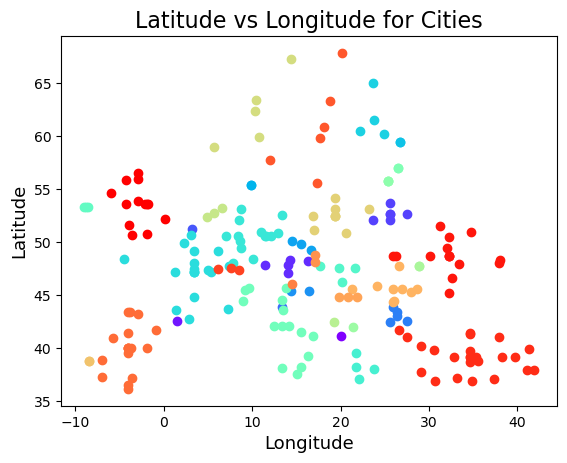

In [19]:
# getting countrys
countrys = df_cities['country'].unique()
# color map so that each country get's its own colr
color_map = plt.get_cmap('rainbow', len(countrys))

for i, country in enumerate(countrys):
    # get cities for each country
    cities = df_cities[df_cities['country'] == country]
    # lat = y, lon = x, 
    plt.scatter(cities['longitude'], cities['latitude'], label=country, color=color_map(i))

# titles
plt.title('Latitude vs Longitude for Cities', size=16)
plt.xlabel('Longitude', size=13)
plt.ylabel('Latitude',size=13)

plt.show()

### [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

In [20]:
# population groups
bins = [0.0, 16.2, 32.4, 48.6, 64.8, 81.0]

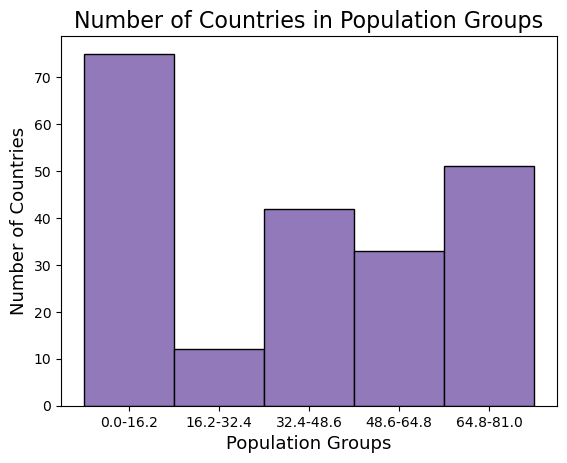

In [21]:
plt.hist(df_cities['population'], bins=bins, color='#9279BA', edgecolor='black') # i love purple

# titles
plt.title('Number of Countries in Population Groups', size=16)
plt.xlabel('Population Groups', size=13)
plt.ylabel('Number of Countries', size=13)

# x ticks
middleofbins=[(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
xticks = ['0.0-16.2', '16.2-32.4', '32.4-48.6', '48.6-64.8', '64.8-81.0']
plt.xticks(middleofbins, xticks, rotation=0, ha='center')

plt.show()

### [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

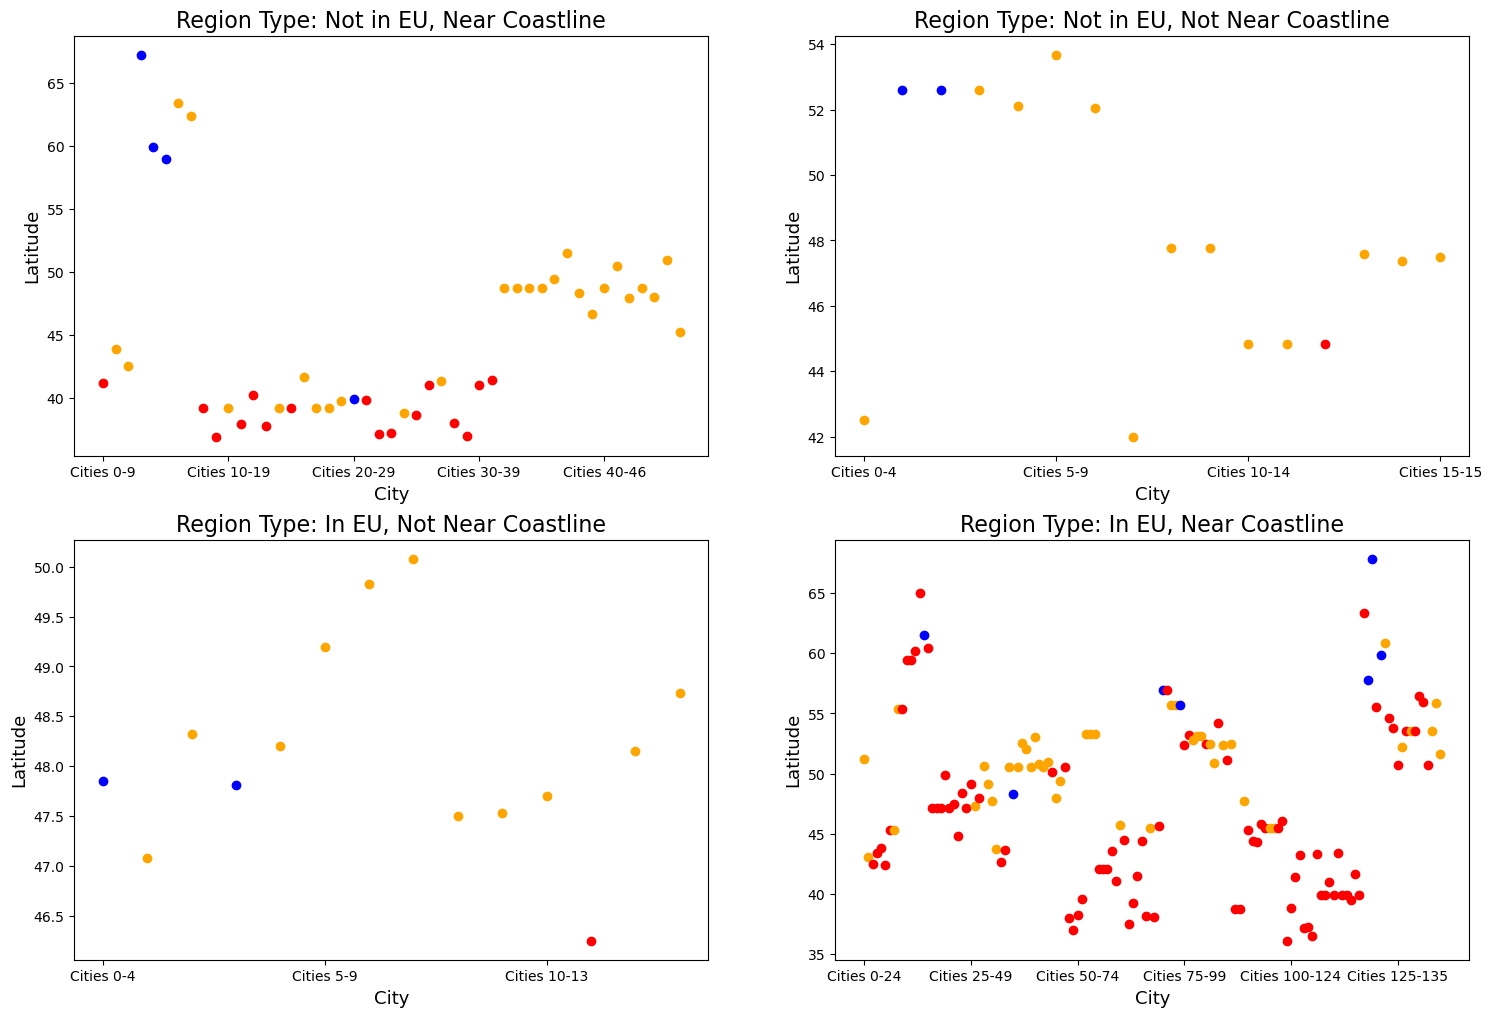

In [24]:
# colors based on temps
def get_color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'

# region type labels
region_type_labels = {
    'no_yes': 'Not in EU, Near Coastline',
    'no_no': 'Not in EU, Not Near Coastline',
    'yes_yes': 'In EU, Near Coastline',
    'yes_no': 'In EU, Not Near Coastline'
}

# remaking region_type column
region_types = df_cities['region_type'].unique()

# subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # Increase figsize for larger plots

# going over
for i, region_type in enumerate(region_types):
    # remaking region_types to cities correlation for the umpteenth time
    region_cities = df_cities[df_cities['region_type'] == region_type]
    
    # making scatter plot
    ax = axs[i // 2, i % 2]
    for j, city in enumerate(region_cities.itertuples()):
        ax.scatter(j, city.latitude, color=get_color(city.temperature))
    
    # xticks and labels based on region type bc there are more cities in some region types
    numofcities = len(region_cities)
    if region_type == 'no_yes':
        xtickincrement = 10
        city_ranges = [f"Cities {start}-{min(start + 9, numofcities - 1)}" for start in range(0, numofcities, 10)]
    elif region_type == 'yes_yes':
        xtickincrement = 25
        city_ranges = [f"Cities {start}-{min(start + 24, numofcities - 1)}" for start in range(0, numofcities, 25)]
    else:
        xtickincrement = 5
        city_ranges = [f"Cities {start}-{min(start + 4, numofcities - 1)}" for start in range(0, numofcities, 5)]
    
    ax.set_xticks(range(0, numofcities, xtickincrement))
    ax.set_xticklabels(city_ranges)
    
    # title based on region type
    ax.set_title(f"Region Type: {region_type_labels.get(region_type, region_type)}", size=16)  # Use descriptive name if available, else use original label

    # axis titles
    ax.set_xlabel('City', size=13)
    ax.set_ylabel('Latitude', size=13)

plt.show()